In [1]:
import numpy as np
import corner as DFM
# --- fomospec ---
from FOMOspec import util as UT
from FOMOspec import fitters as Fitters

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
prosp = Fitters.Prospector()

In [4]:
tt = np.array([-0.5, 0.3, 3., 12., 1e10])
mock_lam = np.linspace(3000, 1e4, 1e3)
mock_flux, _, _ = prosp.model(mock_lam, tt, 0.1)

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


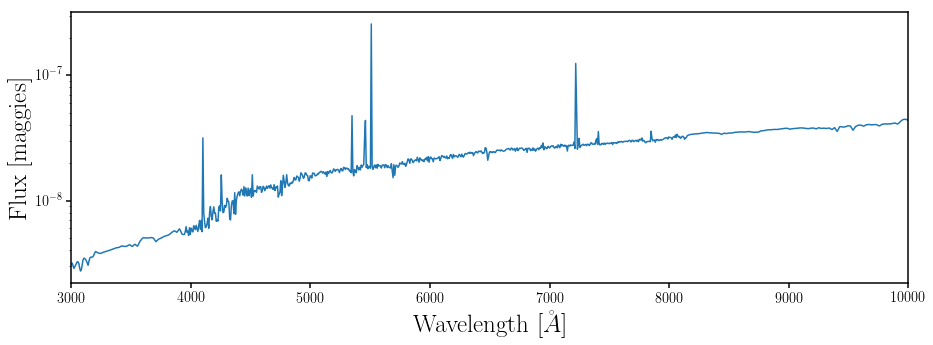

In [5]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(111)
sub.plot(mock_lam, mock_flux)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3e3, 1e4])
sub.set_ylabel('Flux [maggies]', fontsize=25)
sub.set_yscale('log')

In [6]:
prosp.dynesty_spec(mock_lam, mock_flux, None, 0.1, nested=True, write=True, 
                   output_file=''.join([UT .dat_dir(), 'testing_dynesty.h5']))

iter: 1691 | batch: 0 | nc: 1 | ncall: 169656 | eff(%):  0.997 | logz: -12.853 +/-  0.331 | dlogz:  0.000 >  0.050       


done dynesty (initial) in 13018.707561s


iter: 2023 | batch: 1 | nc: 166 | ncall: 233169 | eff(%):  0.888 | loglstar: -2.968 < -0.029 < -1.468 | logz: -12.853 +/-  0.331 | stop:  1.155     

done dynesty (dynamic) in 3720.72135615s
dynesty sampler took 16740.124515 sec
Writing to /Volumes/chang_eHDD/projects/FOMOspec/testing_dynesty.h5
Could not serialize model_params
Could not JSON serialize run_params, pickled instead


In [7]:
samp, obvs = prosp.read_dynesty(''.join([UT.dat_dir(), 'testing_dynesty.h5']))

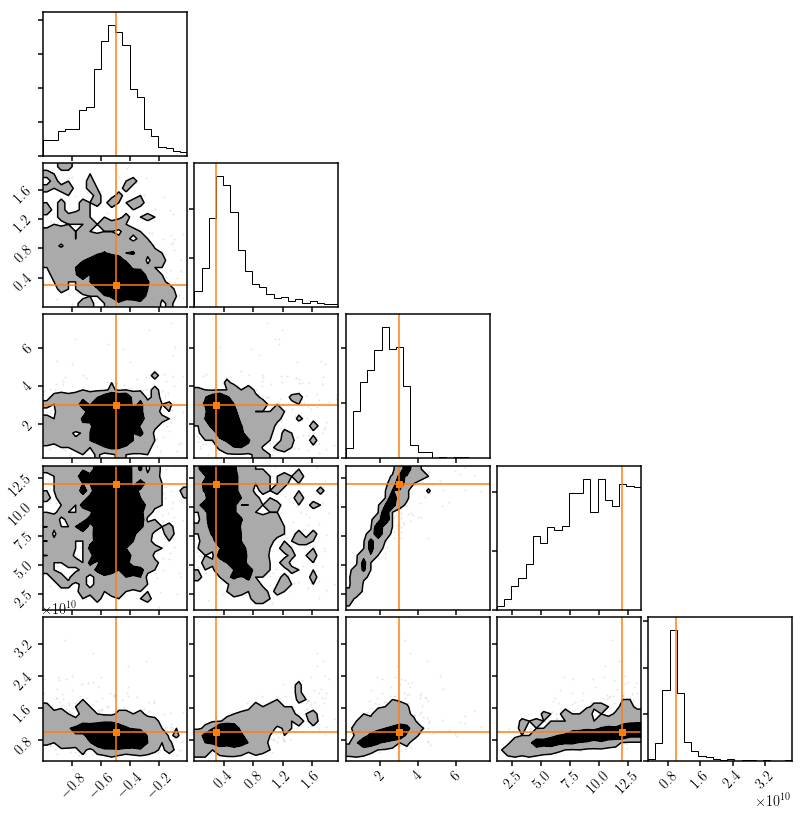

In [9]:
fig = DFM.corner(samp['chain'][500:], truths=tt, truth_color='C1', fill_contours=True,
            levels=[0.68, 0.95])